# Enunciado

(Fonte: Fávero e Belfiore, 2024, Cap. 8) Um grupo de 60 leitores fez uma 
avaliação de três livros de romance e, ao final, escolheram uma das três 
opções. Teste a hipótese nula de que não há diferença na preferência dos 
leitores, ao nível de significância de 5%.

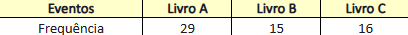

# Imports

In [7]:
import pandas as pd
from scipy.stats import chisquare

# Leitura dos dados

## Frequência Observada

In [8]:
df = pd.DataFrame({
    'Livro A': [29],
    'Livro B': [15],
    'Livro C': [16],
})

df.index = ['Frequencia observada']

df['Total'] = df[['Livro A', 'Livro B', 'Livro C']].sum(axis=1)

df

,Livro A,Livro B,Livro C,Total
Frequencia observada,29,15,16,60


# Resolução

## Proporção

In [9]:
# Calculando as proporções
total_freq_abso = df.loc['Frequencia observada', 'Total']

# Criamos uma nova Series (que será a nossa nova linha) para as proporções.
proporcoes = pd.Series({
    'Livro A': df.loc['Frequencia observada', 'Livro A'] / total_freq_abso,
    'Livro B': df.loc['Frequencia observada', 'Livro B'] / total_freq_abso,
    'Livro C': df.loc['Frequencia observada', 'Livro C'] / total_freq_abso,
}, name='Proporcao') # Damos um nome para essa nova linha, que será o seu índice.

# Adicionando a nova linha de proporções ao DataFrame existente
df = pd.concat([df, pd.DataFrame([proporcoes])])

#Calculando os totais
df['Total'] = df[['Livro A', 'Livro B', 'Livro C']].sum(axis=1)

df

,Livro A,Livro B,Livro C,Total
Frequencia observada,29.000000,15.00,16.000000,60.0
Proporcao,0.483333,0.25,0.266667,1.0


## Frequência esperada

Como é para testar que não há diferença na preferência dos leitores, então a frequência esperada é a média de total de observações.

In [10]:
freq_media_esperada = total_freq_abso / 3

freq_esperada = pd.Series({
    'Livro A': freq_media_esperada,
    'Livro B': freq_media_esperada,
    'Livro C': freq_media_esperada,
}, name='Frequencia esperada')

df = pd.concat([df, pd.DataFrame([freq_esperada])])

#Calculando os totais
df['Total'] = df[['Livro A', 'Livro B', 'Livro C']].sum(axis=1)

df

,Livro A,Livro B,Livro C,Total
Frequencia observada,29.000000,15.00,16.000000,60.0
Proporcao,0.483333,0.25,0.266667,1.0
Frequencia esperada,20.000000,20.00,20.000000,60.0


## Teste Qui²

In [11]:
# Extraindo as frequências observadas da linha 'Frequencia observada'
f_obs = df.loc['Frequencia observada', ['Livro A', 'Livro B', 'Livro C']].values

# Extraindo as frequências esperadas da linha 'Frequencia esperada'
f_exp = df.loc['Frequencia esperada', ['Livro A', 'Livro B', 'Livro C']].values

print(f"\nFrequências Observadas (f_obs): {f_obs}")
print(f"Frequências Esperadas (f_exp): {f_exp}")

# Realiza o teste Qui-quadrado usando scipy.stats.chisquare
chi2_statistic, p_value = chisquare(f_obs=f_obs, f_exp=f_exp)

print(f"\nEstatística Qui-quadrado (scipy.stats): {chi2_statistic:.4f}")
print(f"Valor p (scipy.stats): {p_value:.4f}")


Frequências Observadas (f_obs): [29. 15. 16.]
Frequências Esperadas (f_exp): [20. 20. 20.]

Estatística Qui-quadrado (scipy.stats): 6.1000
Valor p (scipy.stats): 0.0474


## Teste de hipotese

H0 = Não há diferença na preferencia de leitura dos leitores.

H1 = há diferença na preferencia de leitura dos leitores.

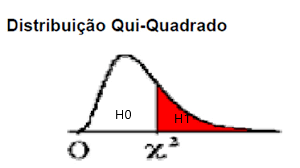
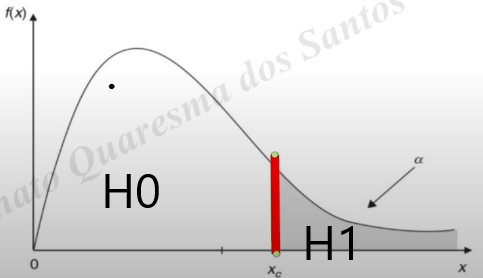

In [12]:
alpha = 0.05
print(f"\nNível de significância (alpha): {alpha}")
if p_value < alpha:
    print("Resultado: Rejeitar a hipótese nula (H0). Há uma diferença significativa nas frequências observadas em relação às esperadas.")
else:
    print("Resultado: Não rejeitar a hipótese nula (H0). Não há evidências suficientes para dizer que as frequências observadas diferem significativamente das esperadas.")


Nível de significância (alpha): 0.05
Resultado: Rejeitar a hipótese nula (H0). Há uma diferença significativa nas frequências observadas em relação às esperadas.


P_valor < que o alpha (nível de significância), significa que ele caiu na região do H1 no gráfico.

Como o p_valor é menor que nível de significância de 5%, a H0 é rejeitada. Portanto, há diferenças significativas nas preferências dos leitores. Ou seja, **existe uma preferência de consumo de certos livros pelos leitores**